<a href="https://colab.research.google.com/github/toraDK/ChatAppK3/blob/main/Minggu5_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Folder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import library

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

Membuat Historam Citra

<BarContainer object of 256 artists>

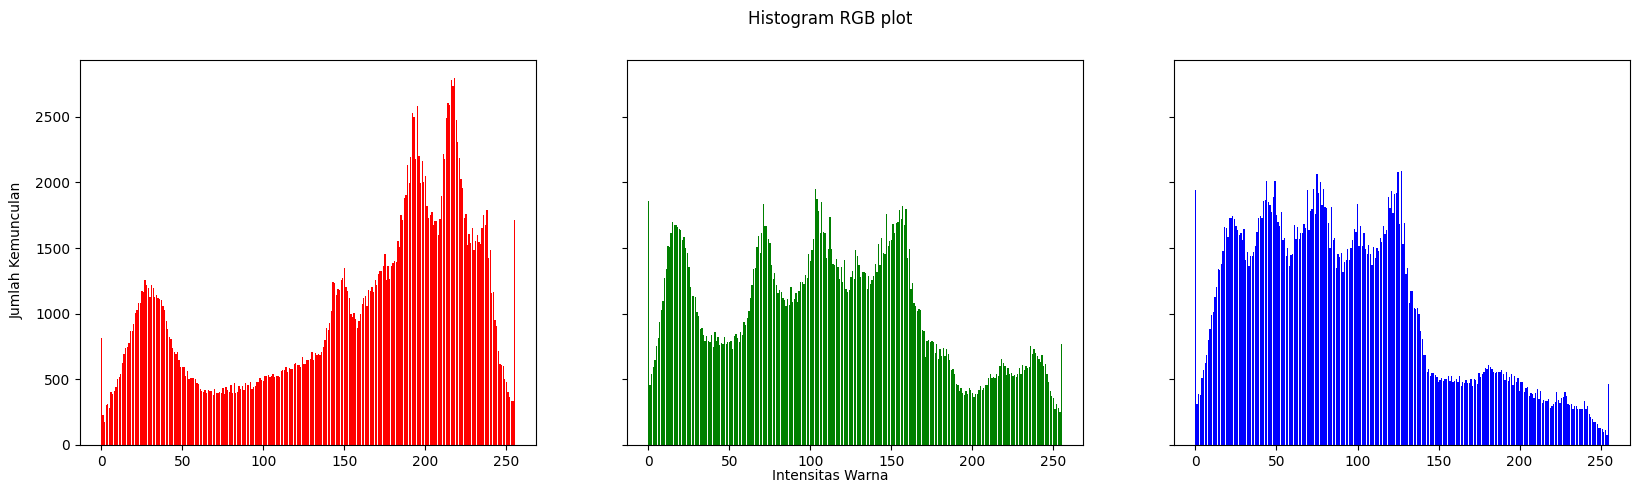

In [4]:
# membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
  for x in range(0,width) :
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')

fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

Merubah gambar dari rgb ke grayscale dan mengembalikannya lagi menjadi rgb

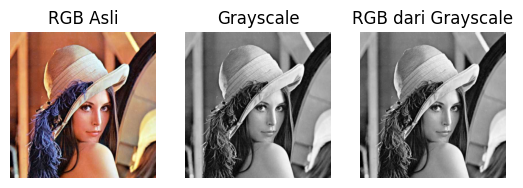

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Baca gambar RGB
img = cv2.imread("/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena.jpg")      # gambar dibaca dalam format BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ubah ke RGB agar sesuai

# --- Konversi RGB ke Grayscale manual ---
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

gray = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)

# --- Konversi Grayscale ke RGB manual ---
rgb_from_gray = np.zeros_like(img)
rgb_from_gray[:, :, 0] = gray
rgb_from_gray[:, :, 1] = gray
rgb_from_gray[:, :, 2] = gray

# Tampilkan hasil
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("RGB Asli")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(rgb_from_gray)
plt.title("RGB dari Grayscale")
plt.axis("off")

plt.show()

Merubah gambar dari rgb ke grayscale dan mengembalikannya lagi menjadi rgb dan menampilkan setiap histogramnya

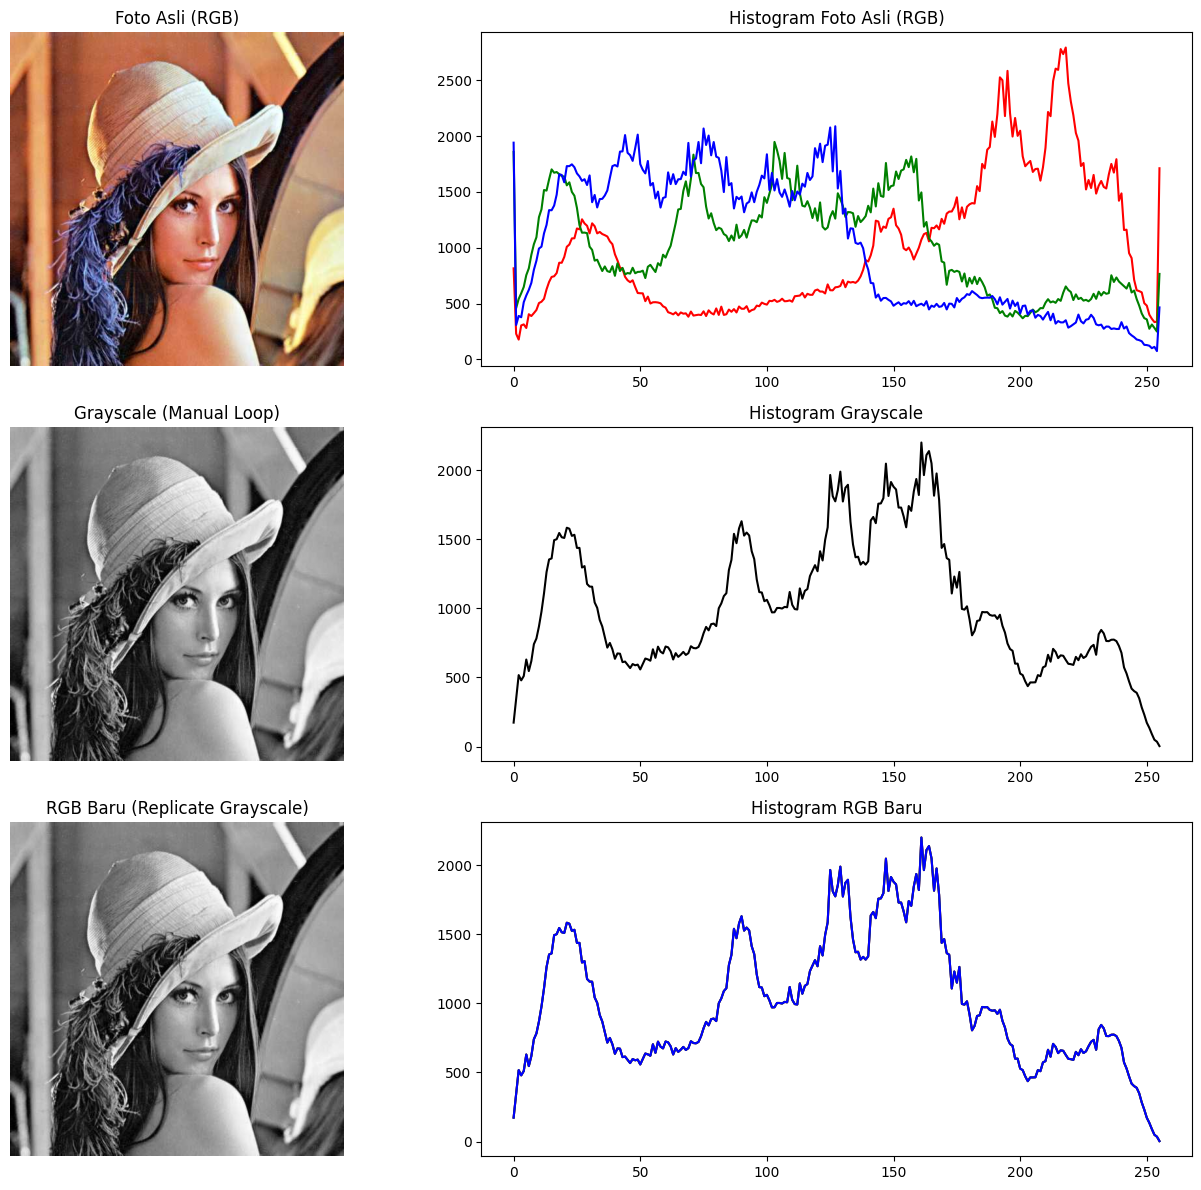

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_grayscale = np.zeros((img_rgb.shape[0], img_rgb.shape[1]), dtype=np.uint8)
for i in range(img_rgb.shape[0]):
    for j in range(img_rgb.shape[1]):
        R = img_rgb[i, j, 0]
        G = img_rgb[i, j, 1]
        B = img_rgb[i, j, 2]
        gray_val = int(0.299 * R + 0.587 * G + 0.114 * B)
        img_grayscale[i, j] = gray_val
rgb_simple = np.stack((img_grayscale,)*3, axis=-1)

hist_r_orig, _ = np.histogram(img_rgb[:,:,0].ravel(), bins=256, range=[0,256])
hist_g_orig, _ = np.histogram(img_rgb[:,:,1].ravel(), bins=256, range=[0,256])
hist_b_orig, _ = np.histogram(img_rgb[:,:,2].ravel(), bins=256, range=[0,256])

hist_gray, _ = np.histogram(img_grayscale.ravel(), bins=256, range=[0,256])

hist_r_new, _ = np.histogram(rgb_simple[:,:,0].ravel(), bins=256, range=[0,256])
hist_g_new, _ = np.histogram(rgb_simple[:,:,1].ravel(), bins=256, range=[0,256])
hist_b_new, _ = np.histogram(rgb_simple[:,:,2].ravel(), bins=256, range=[0,256])

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

axes[0,0].imshow(img_rgb)
axes[0,0].set_title("Foto Asli (RGB)")
axes[0,0].axis("off")

axes[0,1].plot(hist_r_orig, color="red")
axes[0,1].plot(hist_g_orig, color="green")
axes[0,1].plot(hist_b_orig, color="blue")
axes[0,1].set_title("Histogram Foto Asli (RGB)")

axes[1,0].imshow(img_grayscale, cmap="gray")
axes[1,0].set_title("Grayscale (Manual Loop)")
axes[1,0].axis("off")

axes[1,1].plot(hist_gray, color="black")
axes[1,1].set_title("Histogram Grayscale")

axes[2,0].imshow(rgb_simple)
axes[2,0].set_title("RGB Baru (Replicate Grayscale)")
axes[2,0].axis("off")

axes[2,1].plot(hist_r_new, color="red")
axes[2,1].plot(hist_g_new, color="green")
axes[2,1].plot(hist_b_new, color="blue")
axes[2,1].set_title("Histogram RGB Baru")

plt.tight_layout()
plt.show()

Pertanyaan Praktikum D1

1. membuat histogram citra dengan fungsi histograam di library numpy

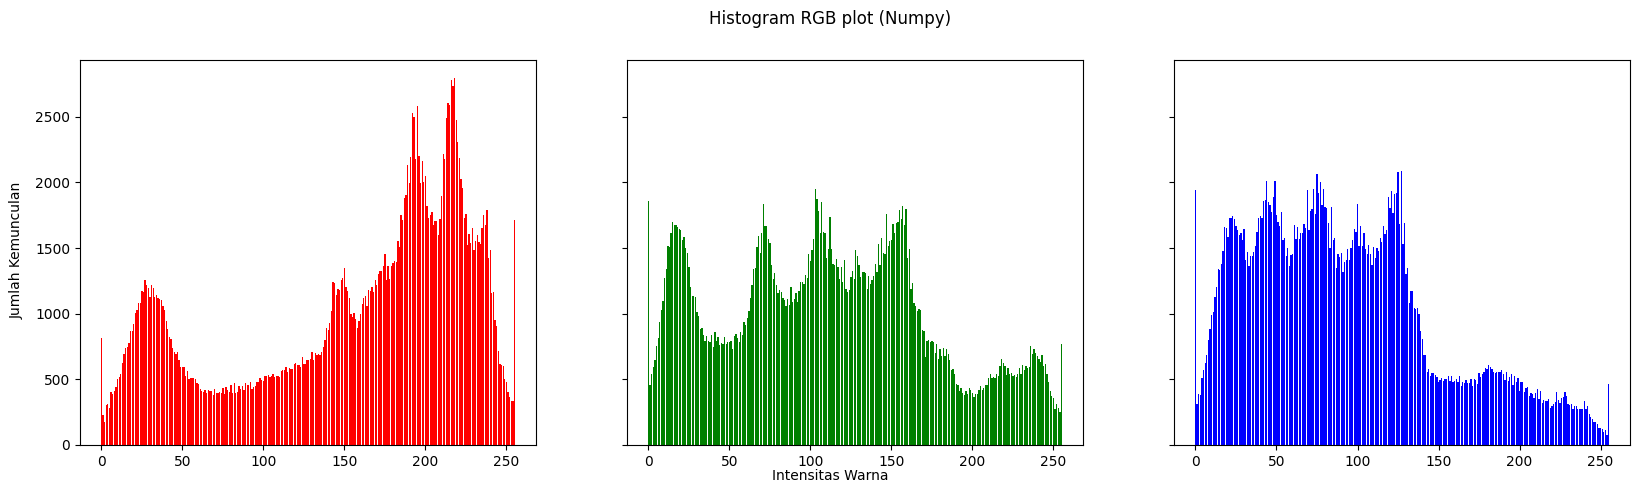

In [9]:
# Muat gambar dan konversi ke RGB
img = cv.imread('/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/Lena.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Pisahkan saluran warna
R, G, B = cv.split(img_rgb)

# Hitung histogram menggunakan np.histogram()
hist_r, bins_r = np.histogram(R.flatten(), 256, [0, 256])
hist_g, bins_g = np.histogram(G.flatten(), 256, [0, 256])
hist_b, bins_b = np.histogram(B.flatten(), 256, [0, 256])

# Tampilkan plot histogram
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (Numpy)')

fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(bins_r[:-1], hist_r, color='red')
axs[1].bar(bins_g[:-1], hist_g, color='green')
axs[2].bar(bins_b[:-1], hist_b, color='blue')

plt.show()

2. membuat histogram dari ktm

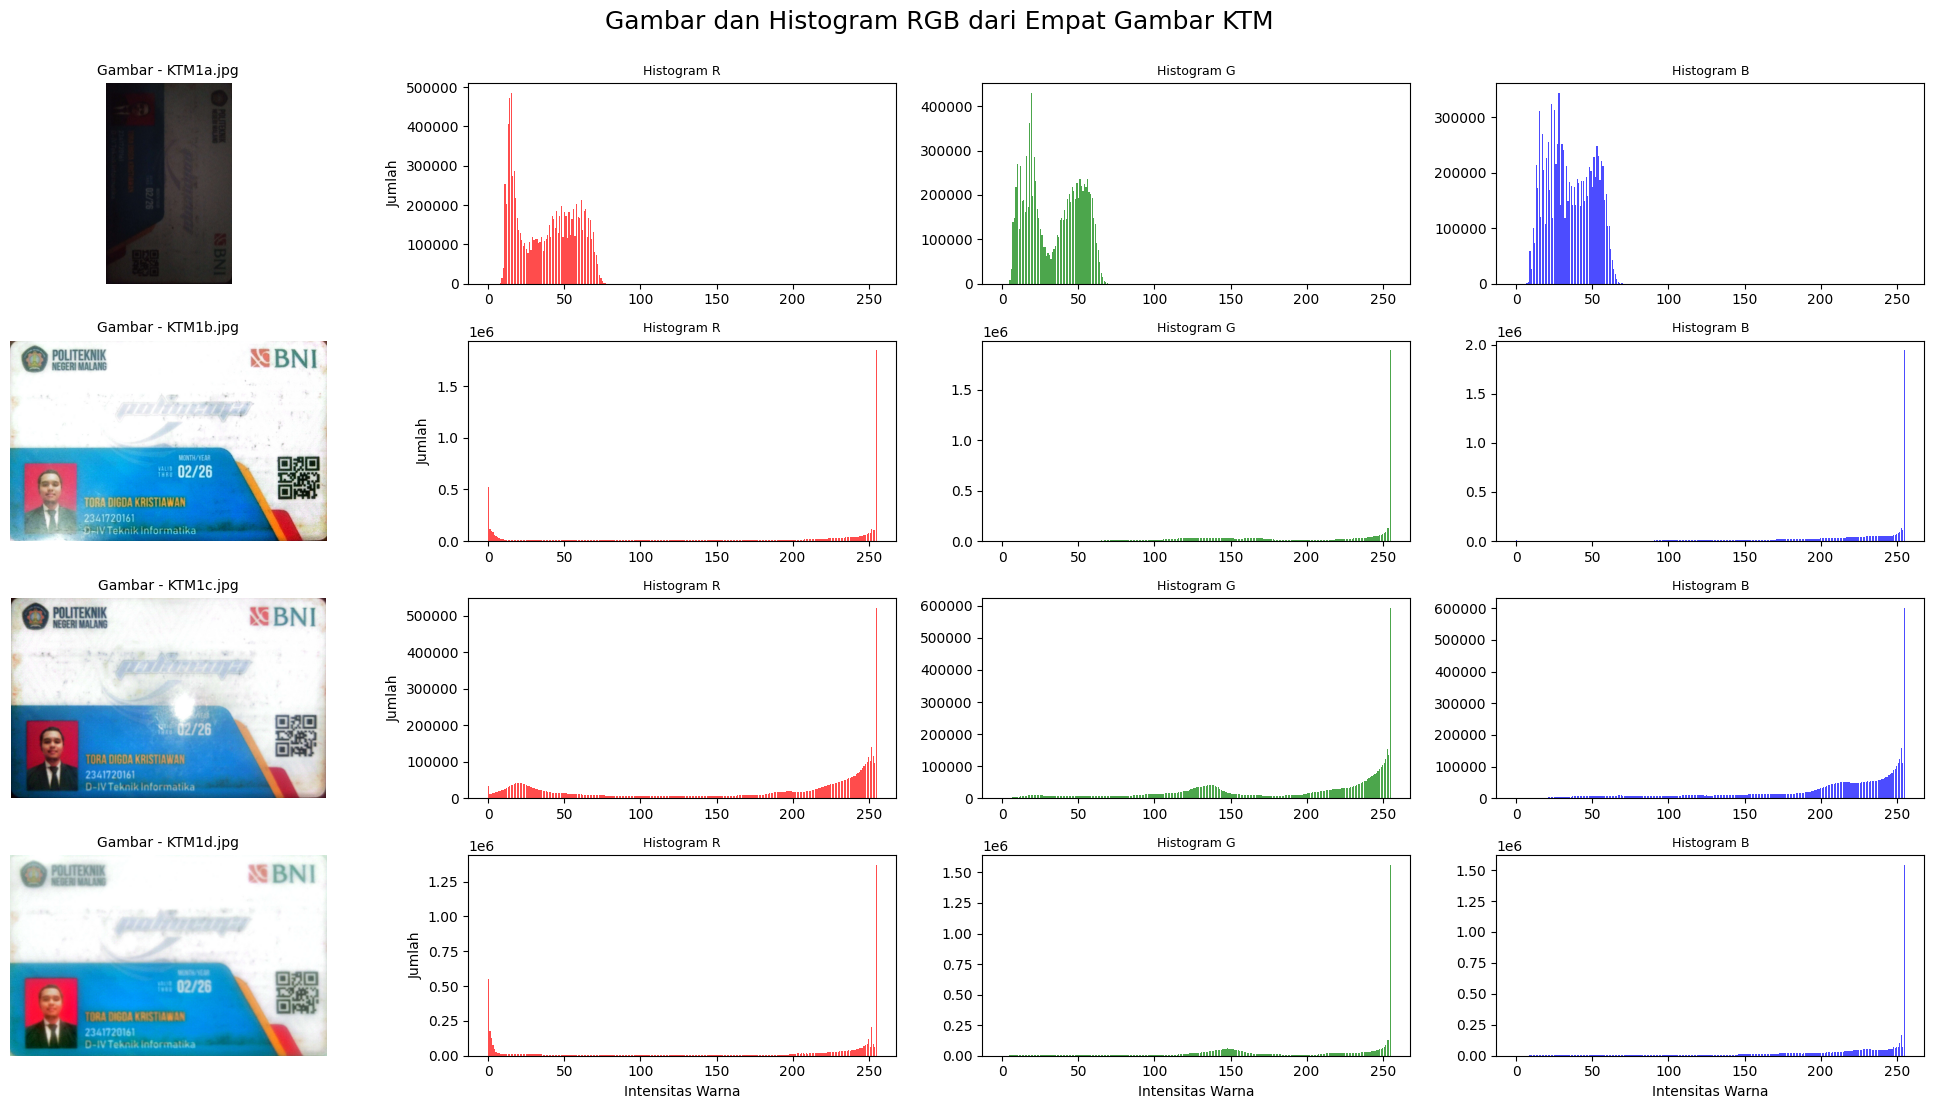

In [16]:
image_files = ['/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1a.jpg',
               '/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1b.jpg',
               '/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1c.jpg',
               '/content/drive/MyDrive/Polinema/tugasSemester5/PengolahanCitradanVisiKomputer/Pertemuan 5/KTM1d.jpg']

# Siapkan figur dan subplot: 4 baris (gambar), 4 kolom (gambar + RGB)
fig, axs = plt.subplots(len(image_files), 4, figsize=(20, 12), sharex=False, sharey=False)
fig.suptitle('Gambar dan Histogram RGB dari Empat Gambar KTM', fontsize=18, y=0.95)

# Looping untuk setiap gambar
for i, filename in enumerate(image_files):
    try:
        img = cv.imread(filename)
        if img is None:
            raise FileNotFoundError(f"File '{filename}' tidak ditemukan.")

        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        R, G, B = cv.split(img_rgb)

        # Hitung histogram
        hist_r, _ = np.histogram(R.flatten(), 256, [0, 256])
        hist_g, _ = np.histogram(G.flatten(), 256, [0, 256])
        hist_b, _ = np.histogram(B.flatten(), 256, [0, 256])

        short_name = os.path.basename(filename)

        # Tampilkan gambar
        axs[i, 0].imshow(img_rgb)
        axs[i, 0].set_title(f'Gambar - {short_name}', fontsize=10)
        axs[i, 0].axis('off')

        # Histogram R
        axs[i, 1].bar(np.arange(256), hist_r, color='red', alpha=0.7)
        axs[i, 1].set_title('Histogram R', fontsize=9)

        # Histogram G
        axs[i, 2].bar(np.arange(256), hist_g, color='green', alpha=0.7)
        axs[i, 2].set_title('Histogram G', fontsize=9)

        # Histogram B
        axs[i, 3].bar(np.arange(256), hist_b, color='blue', alpha=0.7)
        axs[i, 3].set_title('Histogram B', fontsize=9)

        # Tambahkan label sumbu hanya untuk baris paling bawah
        if i == len(image_files) - 1:
            axs[i, 1].set_xlabel('Intensitas Warna')
            axs[i, 2].set_xlabel('Intensitas Warna')
            axs[i, 3].set_xlabel('Intensitas Warna')

        # Tambahkan label y hanya di kolom histogram pertama
        axs[i, 1].set_ylabel('Jumlah')

    except FileNotFoundError as e:
        print(e)
        for j in range(4):
            axs[i, j].text(0.5, 0.5, 'Gambar tidak ditemukan',
                          ha='center', va='center', fontsize=12, color='red')
            axs[i, j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()